<center><h1>Cálculo Numérico</h1></center>
<center><h2>ANN0001 2025/2</h2></center>
<center><h3>Prof. Fernando Deeke Sasse - CCT, UDESC</h3></center>    
<center><h2>Diferenciação Numérica</h2> </center>

### 1. Diferenças Finitas

Nosso problema consiste em calcular a derivada de uma função definida por $f(x)$, denotada por $f'(x)$, para um dado valor específico $x$. Se tivermos uma expressão analítica para $f(x)$ o problema é relativamente simples. Se a expressão é muito complicada podemos usar o módulo simbólico simpy do Python. Por exemplo, suponhamos que 

$$
f(x)= \exp\left(\frac{\sin(x^2)}{x}\right) \qquad (1)
$$

Então para diferenciar esta função podemos proceder do modo descrito a seguir. 

In [1]:
from sympy import *
init_printing()

In [2]:
x = symbols('x')
f = Lambda(x, exp(sin(x**2)/x))
f

        ⎛ 2⎞
     sin⎝x ⎠
     ───────
        x   
x ↦ ℯ       

A derivada pode ser obtida analiticamente do seguinte modo: 

In [3]:
df=f(x).diff(x)
df

                          ⎛ 2⎞
                       sin⎝x ⎠
⎛               ⎛ 2⎞⎞  ───────
⎜     ⎛ 2⎞   sin⎝x ⎠⎟     x   
⎜2⋅cos⎝x ⎠ - ───────⎟⋅ℯ       
⎜               2   ⎟         
⎝              x    ⎠         

Em muitos casos, no entanto, temos que diferenciar uma função  que é definida por valores discretos de uma tabela especificando pares $(x_i, f_i)$. Para resolver tal problema poderíamos usar interpolação ou ajustes, de modo a produzir uma função que se ajusta bem aos dados. Sobre esta função poderíamos aplicar então os métodos analíticos. Tal técnica é útil quando temos dados que possuem um alto grau de ruído. Em alguns casos, no entanto, tal função aproximada falha na captura da informação crucial do valor da derivada de uma função num dado ponto e no erro associado a tal estimativa. Neste caso é mais interessante utilizar a técnica que descreveremos aqui, chamada diferenças finitas. Ela também é útil discretização de equações diferenciais. Veja as referências [1] e [2] para um estudo mais aprofundado.  

A ideia da aproximação por diferenças finitas consiste em partir de expansões em séries de Taylor avançada e atrasada de uma função $f(x)$ definida no ponto de interesse $x$, para determinar $f(x+h)$ e $f(x-h)$, sendo $h$ uma quantidade pequena:

$$
f(x+h) = f(x)+ h f'(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{3!}f^{(4)}(x)+ \cdots. \qquad (2)
$$

Isolando $f'(x)$ em (2) obtemos 

$$
f'(x) = \frac{f(x+h)-f(x)}{h}- \frac{1}{h}\left(\frac{h^2}{2}f''(x)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{3!}f^{(4)}(x)+ \cdots\right). \qquad (3)
$$
 ou 
$$
f'(x) = \frac{f(x+h)-f(x)}{h}+O(h)\,, \qquad (4)
$$
sendo
$$
O(h) = -\left(\frac{h}{2}f''(x)+\frac{h^2}{3!}f'''(x)+\frac{h^2}{3!}f^{(4)}(x)+ \cdots\right) . \qquad (4)
$$

 Quanto menor o valor de $h$ melhor será a aproximação, a não ser que o limite de precisão computacional seja alcançado. A notação $O(h^n)$ será usada daqui em diante para denotar o grau menor grau $n$ da potência de  $h$ entre todos os termos. Este termo é o erro da aproximação e a maior contribuição para o erro vem da menor potência de $h$.  

Uma aproximação a partir de (4) é então dada por pela diferença finita avançada: 

$$
f'(x) \approx \frac{f(x+h)-f(x)}{h}. \qquad (6)
$$

Façamos agora a expansão em série de Taylor atrasada:

$$
f(x-h) = f(x)- h f'(x)+\frac{h^2}{2}f''(x)-\frac{h^3}{3!}f'''(x)+\frac{h^4}{3!}f^{(4)}(x)+ \cdots. \qquad (7)
$$

A partir desta expressão obtemos a fórmula de diferença finita atrasada:
$$
f'(x) = \frac{f(x)-f(x-h)}{h}+O(h)\,, \qquad (8)
$$

$$
f'(x) \approx \frac{f(x)-f(x-h)}{h}\,.  \qquad (9)
$$

Podemos obter uma outra expressão para f'(x) subtraímos (7) de (2) e obtemos

$$
f(x+h)-f(x-h) = 2hf'(x)+2\frac{h^3}{3!}f'''(x)+\cdots . \qquad (10)
$$

Isolando $f'(x)$ obtemos  chamada fórmula de diferença finita central:

$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h}+O(h^2)\,. \qquad (11)
$$

Notemos que agora o erro é de ordem $O(h^2)$. Façamos uma implementação destes métodos:


In [4]:
def derivada(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Método deve ser  'central', 'forward' or 'backward'.")

Neste programa, se não for indicado o método nem $h$, a diferença finita central e $h=0.01$ são automaticamente escolhidos. Façamos um teste calculando a derivada de $f(x)=x^3+x$ em $x=1$. É fácil verificar que $f'(x) = 3x^2+1$ e $f'(1)=4$.

In [5]:
 def f(x):
        return x**3+x

In [6]:
derivada(f,1,method='forward',h=0.001)

4.0030009999996174

Examinemos o erro cometido:

In [7]:
erro1= abs(4 - derivada(f,1,method='forward',h=0.001))
erro1

0.0030009999996174486

Usemos agora a fórmula para o método central, de ordem $O(h^2)$:

In [8]:
derivada(f,1,method='central',h=0.001)

4.000000999999864

O erro cometido é agora dado por:

In [9]:
erro2= abs(4 - derivada(f,1,method='central',h=0.001))
erro2

9.999998642484798e-07

Para que o método da diferença finita avançada tenha a mesma acurácia que o método central, devemos usar $h^2=(0.001)^2=10^{-6}$. De fato,

In [10]:
erro3= abs(4 - derivada(f,1,method='forward',h=0.001**2))
erro3

2.999937635195238e-06

Usando a fórmula de diferença finita atrasada temos 

In [11]:
erro4= abs(4 - derivada(f,1,method='backward',h=0.001**2))
erro4

2.999929634484033e-06

Somando (2) e (7) e isolando $f''(x)$ obtemos diferença finita central para a segunda derivada:

$$
f''(x) = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}+O(h^2)\,. \qquad (12)
$$

Implementemos este método: 

In [12]:
def derivada2(f,a,h=0.01):
        return (f(a+h) -2*f(a)+ f(a-h))/h**2

Testemos esta função em $f(x)=x^3+3x$ avaliado em $x=1$. O resultado exato é $f''(1)=6$. 

In [13]:
 def f(x):
        return x**3+x

In [14]:
derivada2(f,1,h=0.001)

5.9999999995064

Mostramos na tabelas abaixo os coeficiente da aproximações de diferenças finitas de vários tipos: 

1. Diferenças finitas centrais de  ordem $O(h^2)$:

| Termo               | $f(x - 2h)$ | $f(x - h)$ | $f(x)$ | $f(x + h)$ | $f(x + 2h)$ |
|----------------------|--------------|-------------|---------|-------------|--------------|
| $2h f'(x)$           |              | −1          | 0       | 1           |              |
| $h^2 f''(x)$         |              | 1           | −2      | 1           |              |
| $2h^3 f'''(x)$       | −1           | 2           | 0       | −2          | 1            |
| $h^4 f^{(4)}(x)$     | 1            | −4          | 6       | −4          | 1            |


2. Diferenças finitas avançadas de  ordem $O(h^2)$:

 | Termo              | $f(x)$ | $f(x + h)$ | $f(x + 2h)$ | $f(x + 3h)$ | $f(x + 4h)$ |
|--------------------|---------|-------------|--------------|--------------|--------------|
| $h f'(x)$          | −1      | 1           |              |              |              |
| $h^2 f''(x)$       | 1       | −2          | 1            |              |              |
| $h^3 f'''(x)$      | −1      | 3           | −3           | 1            |              |
| $h^4 f^{(4)}(x)$   | 1       | −4          | 6            | −4           | 1            |


3. Diferenças finitas atrasadas de  ordem $O(h^2)$:

| Termo                | $f(x−5h)$ | $f(x−4h)$ | $f(x−3h)$ | $f(x−2h)$ | $f(x−h)$ | $f(x)$ |
|----------------------|----------|----------|----------|----------|---------|-------|
| $2hf'(x)$            |          |          |          | 1        | −4      | 3     |
| $h^2f''(x)$          |          |          | −1       | 4        | −5      | 2     |
| $2h^3f'''(x)$        |          | 3        | −14      | 24       | −18     | 5     |
| $h^4f^{(4)}(x)$      | −2       | 11       | −24      | 26       | −14     | 3     |


### Exemplos

1. Consideremos o seguinte conjunto de dados que definem $f(t)$: 

In [15]:
import numpy as np

In [16]:
t = np.array([0.,0.1,0.2,0.3,0.4])
f = np.array([0.0000, 0.0819, 0.1341, 0.1646, 0.1797])

(i) Determinemos  $f''(0)$ usando diferenças finitas.  Para isso devemos usar a fórmula dada na tabela para diferenças finitas avançadas:

$$
f''(x)= \frac{1}{h^2}\left[2f(x)-5f(x+h)+4f(x+2h)-f(x+3h)\right]\,. \qquad (13)
$$

Aqui, de acordo com os dados, devemos usar $h=0.1$. Portanto, 

In [17]:
h = 0.1
df2 = (2*f[0]-5*f[1]+4*f[2]-f[3])/h**2
df2

np.float64(-3.769999999999998)

(ii) Determinemos $f''(0)$ usando ajuste por mínimos quadrados. Visualizemos os dados num gráfico: 

In [1]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'f')

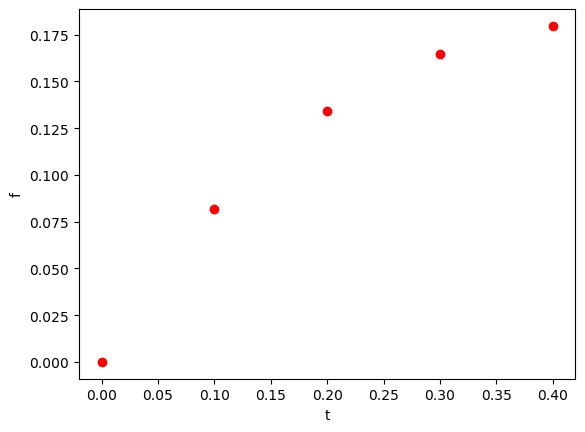

In [19]:
plt.plot(t,f,'ro')
plt.xlabel('t')
plt.ylabel('f')

In [20]:
from scipy.optimize import curve_fit

In [21]:
def g(t, a, b,c,d):
    return a + b*t+c*t**2+d*t**3

In [22]:
c, pcov = curve_fit(g, t, f)

Portanto, os coeficientes do polinômio ajustado são (em ordem crescente de grau):

In [23]:
c

array([ 2.42824682e-05,  9.88297668e-01, -1.82428592e+00,  1.19166694e+00])

É interessante confirmar visualmente o sucesso do ajuste:

In [24]:
T = np.linspace(-0.02, 0.41,30)

Text(0, 0.5, 'f')

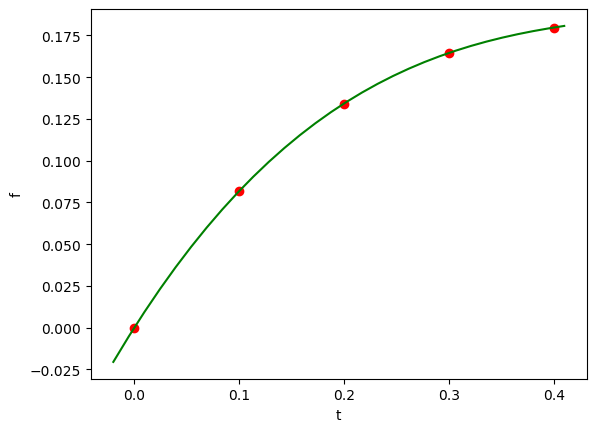

In [25]:
plt.plot(t,f,'ro', T, g(T, *c), 'g-')
plt.xlabel('t')
plt.ylabel('f')

Temos agora a função que ajusta os dados, que pode ser diferenciada analiticamente: 

In [26]:
from sympy import *
x = symbols('x')
init_printing(use_unicode=True)

In [27]:
p = c[0]+c[1]*x+c[2]*x**2+c[3]*x**3
p

In [28]:
dp = diff(p,x,x)
dp

In [29]:
dp.subs(x,0)

O valor é numericamente um pouco diferente daquele obtido usando diferenças finitas chama atenção para o fato de que cuidado na avaliação dos resultados é necessária. De qualquer modo, este exemplo tem como objetivo, mais do que outra coisa, estabelecer uma metodologia para a resolução de outros problemas mais realistas. 

2. Podemos tentar resolver o problema anterior usando interpolação polinomial simples: 

In [30]:
from scipy.interpolate import lagrange

In [31]:
F = lagrange(t, f)
F

poly1d([-0.70833333,  1.75833333, -1.96291667,  0.99841667,  0.        ])

Visualizemos graficamente: 

In [32]:
T = np.linspace(-0.02, 0.41,30)

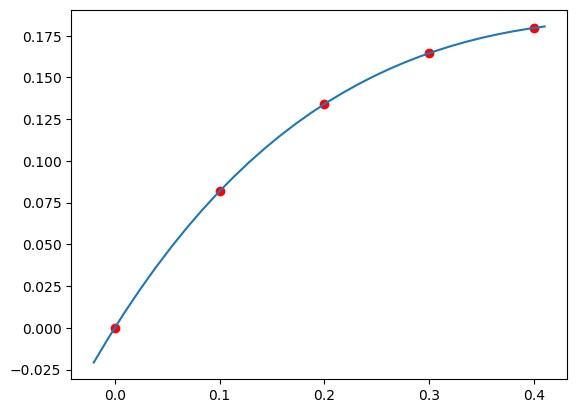

In [33]:
plt.plot(t,f,'ro', T, F(T), '-')

Usando a aproximação de diferença finita (12) obtemos: 

In [34]:
def derivada2(f,a,h=0.01):
        return (F(a+h) -2*F(a)+ F(a-h))/h**2

In [35]:
derivada2(F,0,h=0.01)

Podemos também diferenciar analiticamente o polinômio: 

In [36]:
pL = F[0]+F[1]*x+F[2]*x**2+F[3]*x**3
pL

In [37]:
dpL = diff(pL,x,x)
dpL

In [38]:
dpL.subs(x,0)

### 2. Extrapolação de Richardson

O método de extrapolação de Richardson permite melhorar a acurácia de certos processos numéricos e acelerar a computação de séries numéricas de convergência lenta. Suponhamos que temos um meio aproximado para computar uma quantidade $G$. Além disso, vamos supor que o resultado da aproximação depende um parâmetro $h$ (tal como acontece nas aproximações por diferenças finitas). Denotemos a aproximação por $g(h)$, de modo que 

$$
G=g(h)+E(h)\,,\qquad (14)
$$

sendo $E(h)$ o erro. A extrapolação de Richardson consegue remover o erro, contanto que ele seja da forma $E=ch^p$, sendo $c$ e $p$ constantes, ou seja, 

$$
G=g(h)+c h^p\,.
$$

Notemos que a suposição é a de que o erro é proporcional a um termo com fator dominante $h^p$, sendo a constante de proporcionalidade $c$ em princípio desconhecida.  Os outros termos de grau superior a $p$ não estão contabilizados. Eliminar o erro de orderm $O(h^p)$ significa determinar $c$ em termos de quantidades conhecidas, ou seja, incorporar este termo ao cálculo de $G$. Para isso, começamos computando $g(h)$ com algum valor de $h$, digamos, $h=h_1$. Temos então

$$
G= g(h_1)+ch_1^p\,.\qquad (15)
$$


Repetimos agora o cálculo com $h=h_2$, de modo que 

$$
G = g(h_2)+ch_2^p\,.\qquad (16)
$$

Eliminando $c$ de (16) temos

$$
c = \frac{G-g(h_2)}{h_2^p}\,.\qquad (17)
$$

Substituindo esta expressão em (15) obtemos

$$
G = g(h_1)+\frac{G-g(h_2)}{h_2^p}h_1^p\,,\qquad (18)
$$

ou

$$
G\left[1-\left(\frac{h_1}{h_2}\right)^p\right]=g(h_1)-g(h_2)\left(\frac{h_1}{h_2}\right)^p\,,\qquad (19)
$$

de modo que 

$$
G= \frac{(h_1/h_2)^p g(h_2)-g(h_1)}{(h_1/h_2)^p-1}\,,\qquad (20)
$$

que é a fórmula de extrapolação de Richardson. É comum usarmos $h_2= h_1/2$, de modo que

$$
G= \frac{2^p g(h_1/2)-g(h_1)}{2^p-1}\,.\qquad (21)
$$

O erro ainda existe mas agora é de ordem $O(h^{p+1})$ ou superior. Consideremos novamente o exemplo dado anteriormente: 

In [39]:
t = np.array([0.,0.1,0.2,0.3,0.4])
f = np.array([0.0000, 0.0819, 0.1341, 0.1646, 0.1797])

Calculemos $f'(0.2)$ usando a aproximação de diferença finita central com $O(h^2)$, ou seja, 

$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h}+O(h^2)\,. \qquad (22)
$$

ou 

In [40]:
h = 0.1
df1 = (f[3]-f[1])/(2*h)
df1

Utilizemos agora a extrapolação de Richardson:

In [41]:
h = 0.2
g1 = (f[4]-f[0])/(2*h)
g1

In [42]:
h = 0.1
g2 = (f[3]-f[1])/(2*h)
g2

Lembremos que nestas aproximações o erro é da forma $E(h)=c_1h^2+c_2h^4+\cdots$. A extrapolação elimina o termo dominante de erro, proporcional a $h^2$. 

In [43]:
p=2
G= (2**p*g2-g1)/(2**p-1)
G

que é a aproximação  diferença finita de ordem $O(h^4)$. 

### Exercícios

**1.** Sejam os dados mostrados na seguinte tabela:

<table>
  <tr>
    <td><i>$t$</i></td>
    <td>0.0</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.3</td>
    <td>0.4</td>
  </tr>
  <tr>
    <td><i>$f(t)$</i></td>
    <td>0.0000</td>
    <td>0.0819</td>
    <td>0.1341</td>
    <td>0.1646</td>
    <td>0.1797</td>
  </tr>
</table>

determine $f'(0.25)$ usando interpolação polinomial. 

**2.** Use interpolação polinomial para determinar  $f'(0)$ e $f''(0)$ usando os dados:

<table style="border-collapse: collapse; text-align: center;">
  <tr>
    <td><i>$x$</i></td>
    <td>-2.2</td>
    <td>-0.3</td>
    <td>0.8</td>
    <td>1.9</td>
  </tr>
  <tr>
    <td><i>$f(x)$</i></td>
    <td>15.180</td>
    <td>10.962</td>
    <td>1.920</td>
    <td>-2.040</td>
  </tr>
</table>

**3.** Repita o problema anterior usando ajuste (determine uma função de ajuste conveniente).

**4.** 
Use aproximações por diferenças finitas de ordem $O(h^2)$ para calcular $f'(2{,}36)$ e $f''(2{,}36)$ a partir dos seguintes dados:

<table style="border-collapse: collapse; text-align: center;">
  <tr>
    <td><i>x</i></td>
    <td>2,36</td>
    <td>2,37</td>
    <td>2,38</td>
    <td>2,39</td>
  </tr>
  <tr>
    <td><i>f(x)</i></td>
    <td>0,85866</td>
    <td>0,86289</td>
    <td>0,86710</td>
    <td>0,87129</td>
  </tr>
</table>


**5.**
Estime $f'(1)$ e $f''(1)$ a partir dos seguintes dados:

| $x$   | 0,97   | 1,00   | 1,05   |
|-------|--------|--------|--------|
| $f(x)$ | 0,85040 | 0,84147 | 0,82612 |

**6.**
Dados os valores:

| $x$   | 0,84   | 0,92   | 1,00   | 1,08   | 1,16   |
|-------|--------|--------|--------|--------|--------|
| $f(x)$ | 0,431711 | 0,398519 | 0,367879 | 0,339596 | 0,313486 |

calcule $f''(1)$ da forma mais precisa possível.

**7.**
Use os dados da tabela para calcular $f'(0{,}2)$ da forma mais precisa possível:

| $x$   | 0,0   | 0,1   | 0,2   | 0,3   | 0,4   |
|-------|-------|-------|-------|-------|-------|
| $f(x)$ | 0,000000 | 0,078348 | 0,138910 | 0,192916 | 0,244981 |

**8.**
Use interpolação polinomial para calcular $f'(0)$ e $f''(0)$, utilizando os seguintes dados:

| $x$   | −2.2   | −0.3   | 0.8   | 1.9   |
|-------|--------|--------|--------|--------|
| $f(x)$ | 15.180 | 10.962 | 1.920 | −2.040 |


**9.** Rastreamento por radar. As estações de radar **A** e **B**, separadas por uma distância $a = 500\,\text{m}$, rastreiam o avião **C** registrando os ângulos $\alpha$ e $\beta$ em intervalos de um segundo. Um diagrama esquemático do problema é mostrado na Figura  1 ([1], p.197). 

<figure style="text-align:center;">
  <img src="radar.png" alt="Radar diagram" width="250">
  <figcaption>Figura 1 –  Geometria do radar mostrando os ângulos $\alpha$, $\beta$ e $\gamma$.</figcaption>
</figure>

Se três leituras sucessivas são dadas por:

| $t$ (s) | 9 | 10 | 11 |
|----------|----|----|----|
| $\alpha$ | 54.80° | 54.06° | 53.34° |
| $\beta$  | 65.59° | 64.59° | 63.62° |

Calcule a *velocidade* $v$ do avião e o *ângulo de subida* $\gamma$ no instante $t = 10\,\text{s}$.

As coordenadas do avião podem ser expressas por:

$$
x = a \, \frac{\tan \beta}{\tan \beta - \tan \alpha}, \qquad
y = a \, \frac{\tan \alpha \, \tan \beta}{\tan \beta - \tan \alpha}.
$$

**10.**
A relação entre a tensão $\sigma$ e a deformação $\varepsilon$ em tração uniaxial é

$$
\frac{d\sigma}{d\varepsilon} = a + b\,\sigma\,,
$$

sendo $a$ e $b$  constantes ( $\frac{d\sigma}{d\varepsilon}$ é o *módulo tangente* ).

A tabela a seguir apresenta os resultados de um ensaio de tração nesse material:

| Deformação $\varepsilon$ | Tensão $\sigma$ (MPa) |
|--------------------------|------------------------|
| 0.00 | 0.000 |
| 0.05 | 0.252 |
| 0.10 | 0.531 |
| 0.15 | 0.840 |
| 0.20 | 1.184 |
| 0.25 | 1.558 |
| 0.30 | 1.975 |
| 0.35 | 2.444 |
| 0.40 | 2.943 |
| 0.45 | 3.500 |
| 0.50 | 4.115 |

Determine os parâmetros $a$ e $b$ por regressão linear.


### Referências

1. Jaan Kiusalaas, Numerical Methods in Engineering with Python 3, Cambridge University Press, 2013.
2. Alex, Gezerlis, Numerical Methods in Physics with Python, Cambridge University Press, 2020. 